In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error

In [74]:
california= california_housing.fetch_california_housing()

In [75]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [76]:
data= pd.DataFrame(california.data, columns= california.feature_names)

In [77]:
data['target']= california.target

In [78]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [79]:
data.head(9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267


In [80]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [81]:
data[['MedInc', 'target']].describe()

,MedInc,target
count,20640.000000,20640.000000
mean,3.870671,2.068558
std,1.899822,1.153956
min,0.499900,0.149990
25%,2.563400,1.196000
50%,3.534800,1.797000
75%,4.743250,2.647250
max,15.000100,5.000010


###### Removing Outliers and Scaling data

In [82]:
data= data[data['target']<5]

def scale(x):
    min= x.min()
    max= x.max()
    return pd.Series([(i-min)/(max- min) for i in x])

X= scale(data['MedInc'])
y= scale(data['target'])

In [83]:
X.max(), y.max()

(1.0, 1.0)

###### Simple Linear Regression

In [84]:
class SimpleLinearRegression:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.m = ((np.mean(X*y) - np.mean(X) * np.mean(y))/(np.mean(X**2) - np.mean(X)**2))
        self.b = np.mean(y) - self.m * np.mean(X)
        
    def coeffs(self):
        return self.m, self.b
    
    def predict(self):
        self.y_pred = self.m * self.X +self.b
        return self.y_pred
    
    def r_squared(self):
        self.y_mean = np.full( len(y), np.mean(y))
        err_reg = sum((self.y - self.y_pred)**2)
        err_y_mean = sum((self.y - self.y_mean)**2)
        return (1 - (err_reg/err_y_mean))

In [85]:
def plot_regression(X , y, y_pred, log= None, title= 'Linear Regression'):
    
    plt.figure(figsize=(16,6))
    plt.rcParams['figure.dpi']= 227
    plt.scatter(X, y, label= 'Data', c= '#388fd8', s=6)
    if log!= None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw= 1, c= '#caa727', alpha= 0.15)
    plt.plot(X, y_pred, c= '#ff7702', lw=3, label= 'Regression')
    plt.title(title, fontSize= 14)
    plt.xlabel('longitude', fontSize= 11)
    plt.ylabel('latitude', fontSize=11)
    plt.legend(frameon= True, loc= 1, fontsize=10, borderpad=0.6)
    plt.tick_params(direction='out', length=6, color= '#a0a0a0', width=1, grid_alpha= 0.6)
    plt.show()

In [86]:
X = data['MedInc']
y = data['target']


lr = SimpleLinearRegression()

In [87]:
lr.fit(X,y)

In [88]:
y_pred = lr.predict()

MSE: 0.5485962279736201


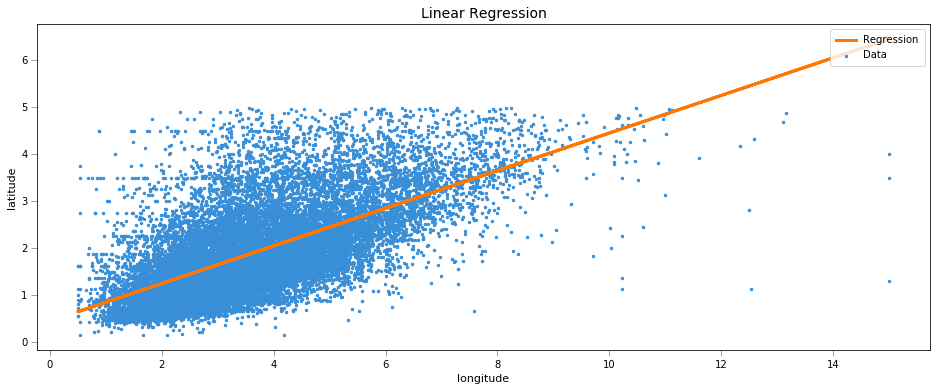

In [89]:
print('MSE:', mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, title = 'Linear Regression')


###### Multiple Linear Regression with Least Squares


In [95]:
data['constant'] = 1
X = data.drop('target', axis = 1)
y = data['target']

In [121]:
class MultipleLinearRegression:
    
    '''
    Multiple Linear Regression with Least Square
    '''
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coeffs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coeffs[i]
        return result
    
    def coeffs(self):
        return self.coeffs
        

In [122]:
mlp = MultipleLinearRegression()

In [123]:
mlp.fit(X, y)

In [124]:
y_pred = mlp.predict(X)

In [100]:
mean_squared_error(y, y_pred)

0.5485962279736201

###### Batch Gradient Descent

In [126]:
def gradient_descent(X, y,alpha=0.05, epoch=10):

    '''
    Gradient Descent for single feature
    '''
    
    m,b = 0.2,0.2 #Initialising
    log, mse = [],[]  #lists to store learning process
    N = len(X) #number of samples
    
    for _ in range(epoch):
        
        f= y - (m*X + b)
        
        #Updating m and b
        m -= alpha * (-2 * X.dot(f).sum() / N)
        b -= alpha * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, (m * X + b)))
            
    return m, b, log, mse   

###### Predicting House Price with Gradient Descent

MSE: 0.5518154158607774


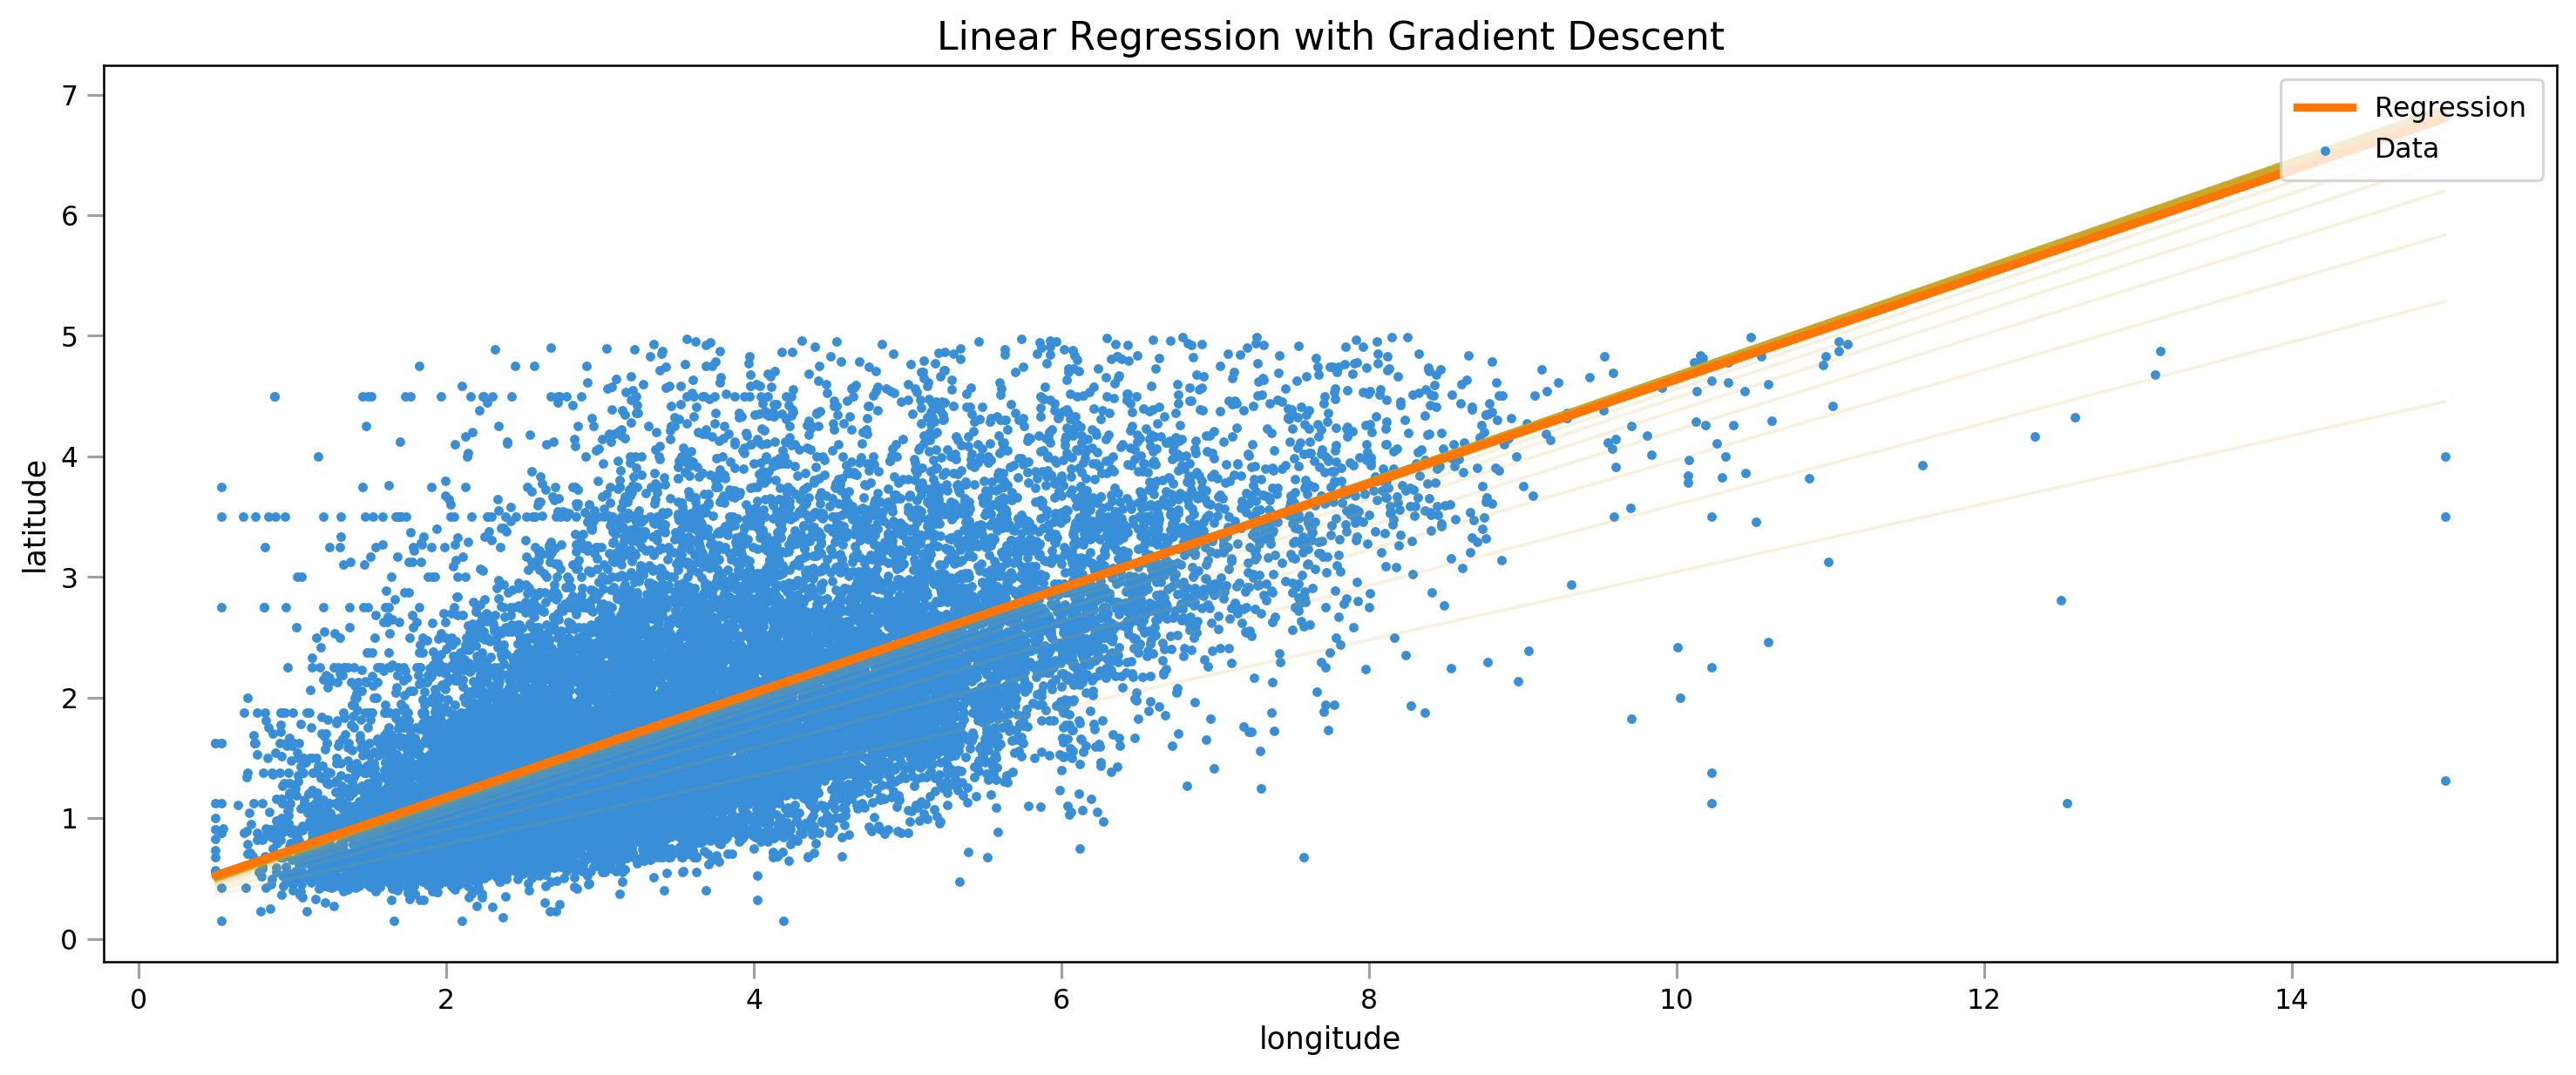

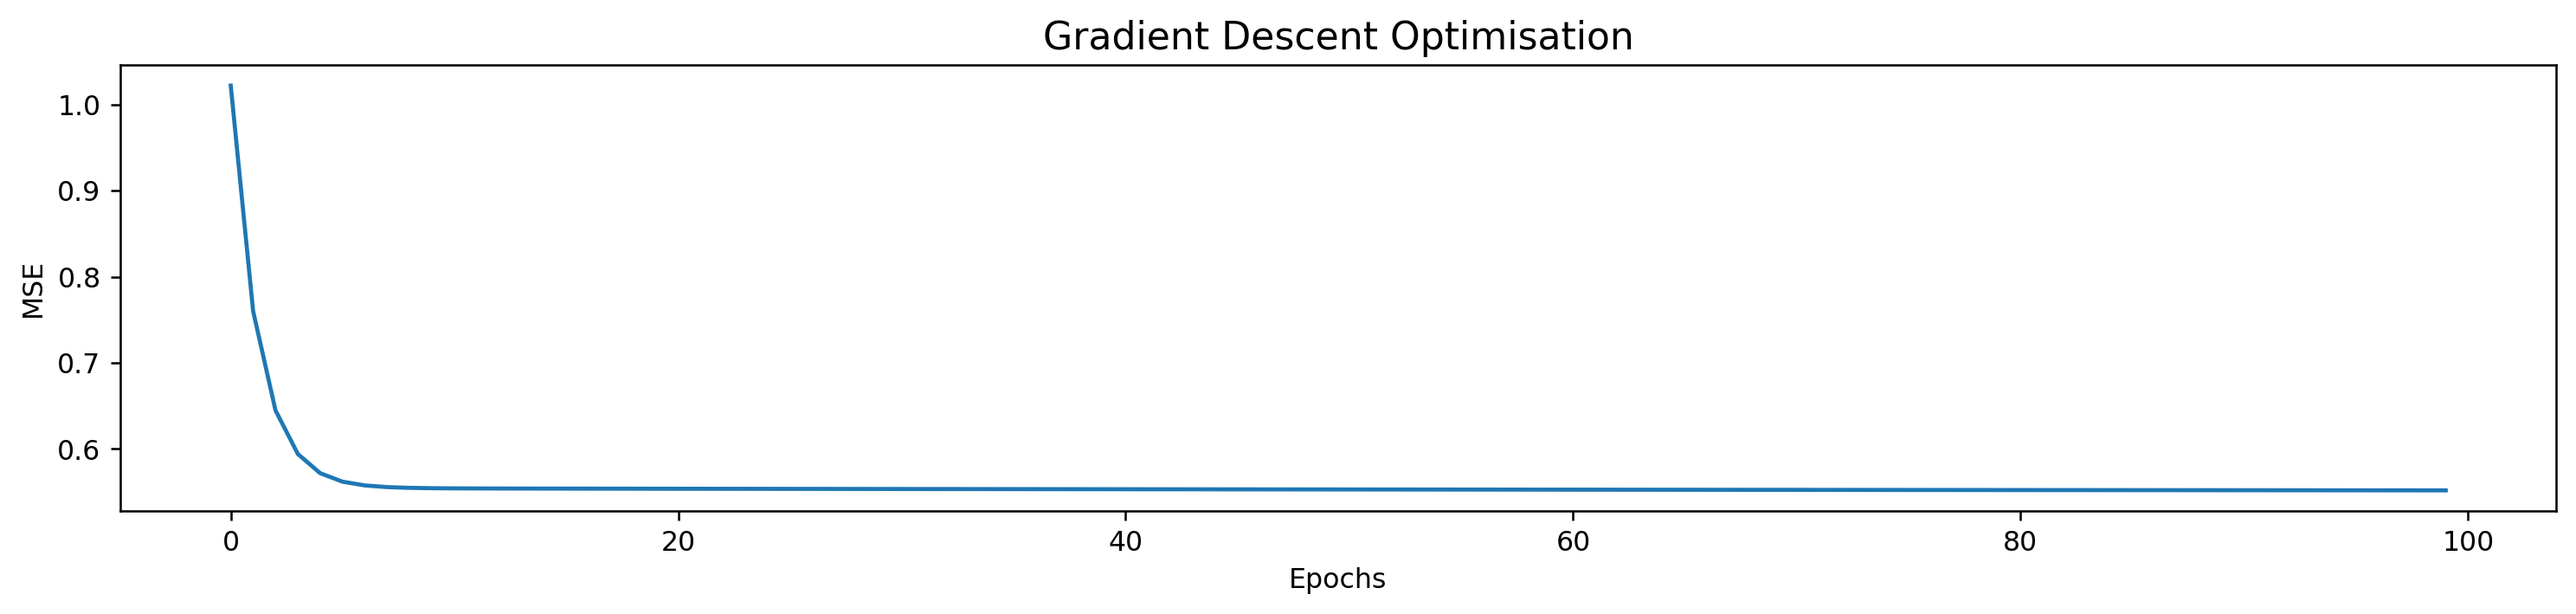

In [127]:
X= data['MedInc']
y= data['target']

m, b, log, mse = gradient_descent(X, y, alpha= 0.01, epoch=100)

y_pred= m * X + b

print("MSE:", mean_squared_error(y, y_pred))

plot_regression(X, y, y_pred, log= log, title= 'Linear Regression with Gradient Descent')

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi']= 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimisation', fontSize= 14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

###### Stochastic Gradient Descent

In [128]:
def SGD(X, y, alpha = 0.05, epoch=10, batch_size = 1):

    '''
    Stochastic Gradient Descent for single Feature

    '''
    
    m, b = 0.5, 0.5  #Initialisation
    log, mse = [],[]  #lists to store learning process
    
    for _ in range(epoch):
        
        indexes = np.random.randint(0, len(X), batch_size)  #random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(X, indexes)
        N  = len(Xs)
        
        f = ys - (m * Xs + b)
        
        #Updating parameters m and b
        
        m -= alpha * ( -2 * Xs.dot(f).sum() / N )
        b -= alpha * ( -2 * f.sum() / N )
    
        log.append((m, b))
        mse.append(mean_squared_error(y, m * X + b))
        
    return m, b, log, mse



In [129]:
m ,b , log, mse = SGD(X, y, alpha= 0.01, epoch = 100, batch_size= 2)

MSE: 4.445172745806621


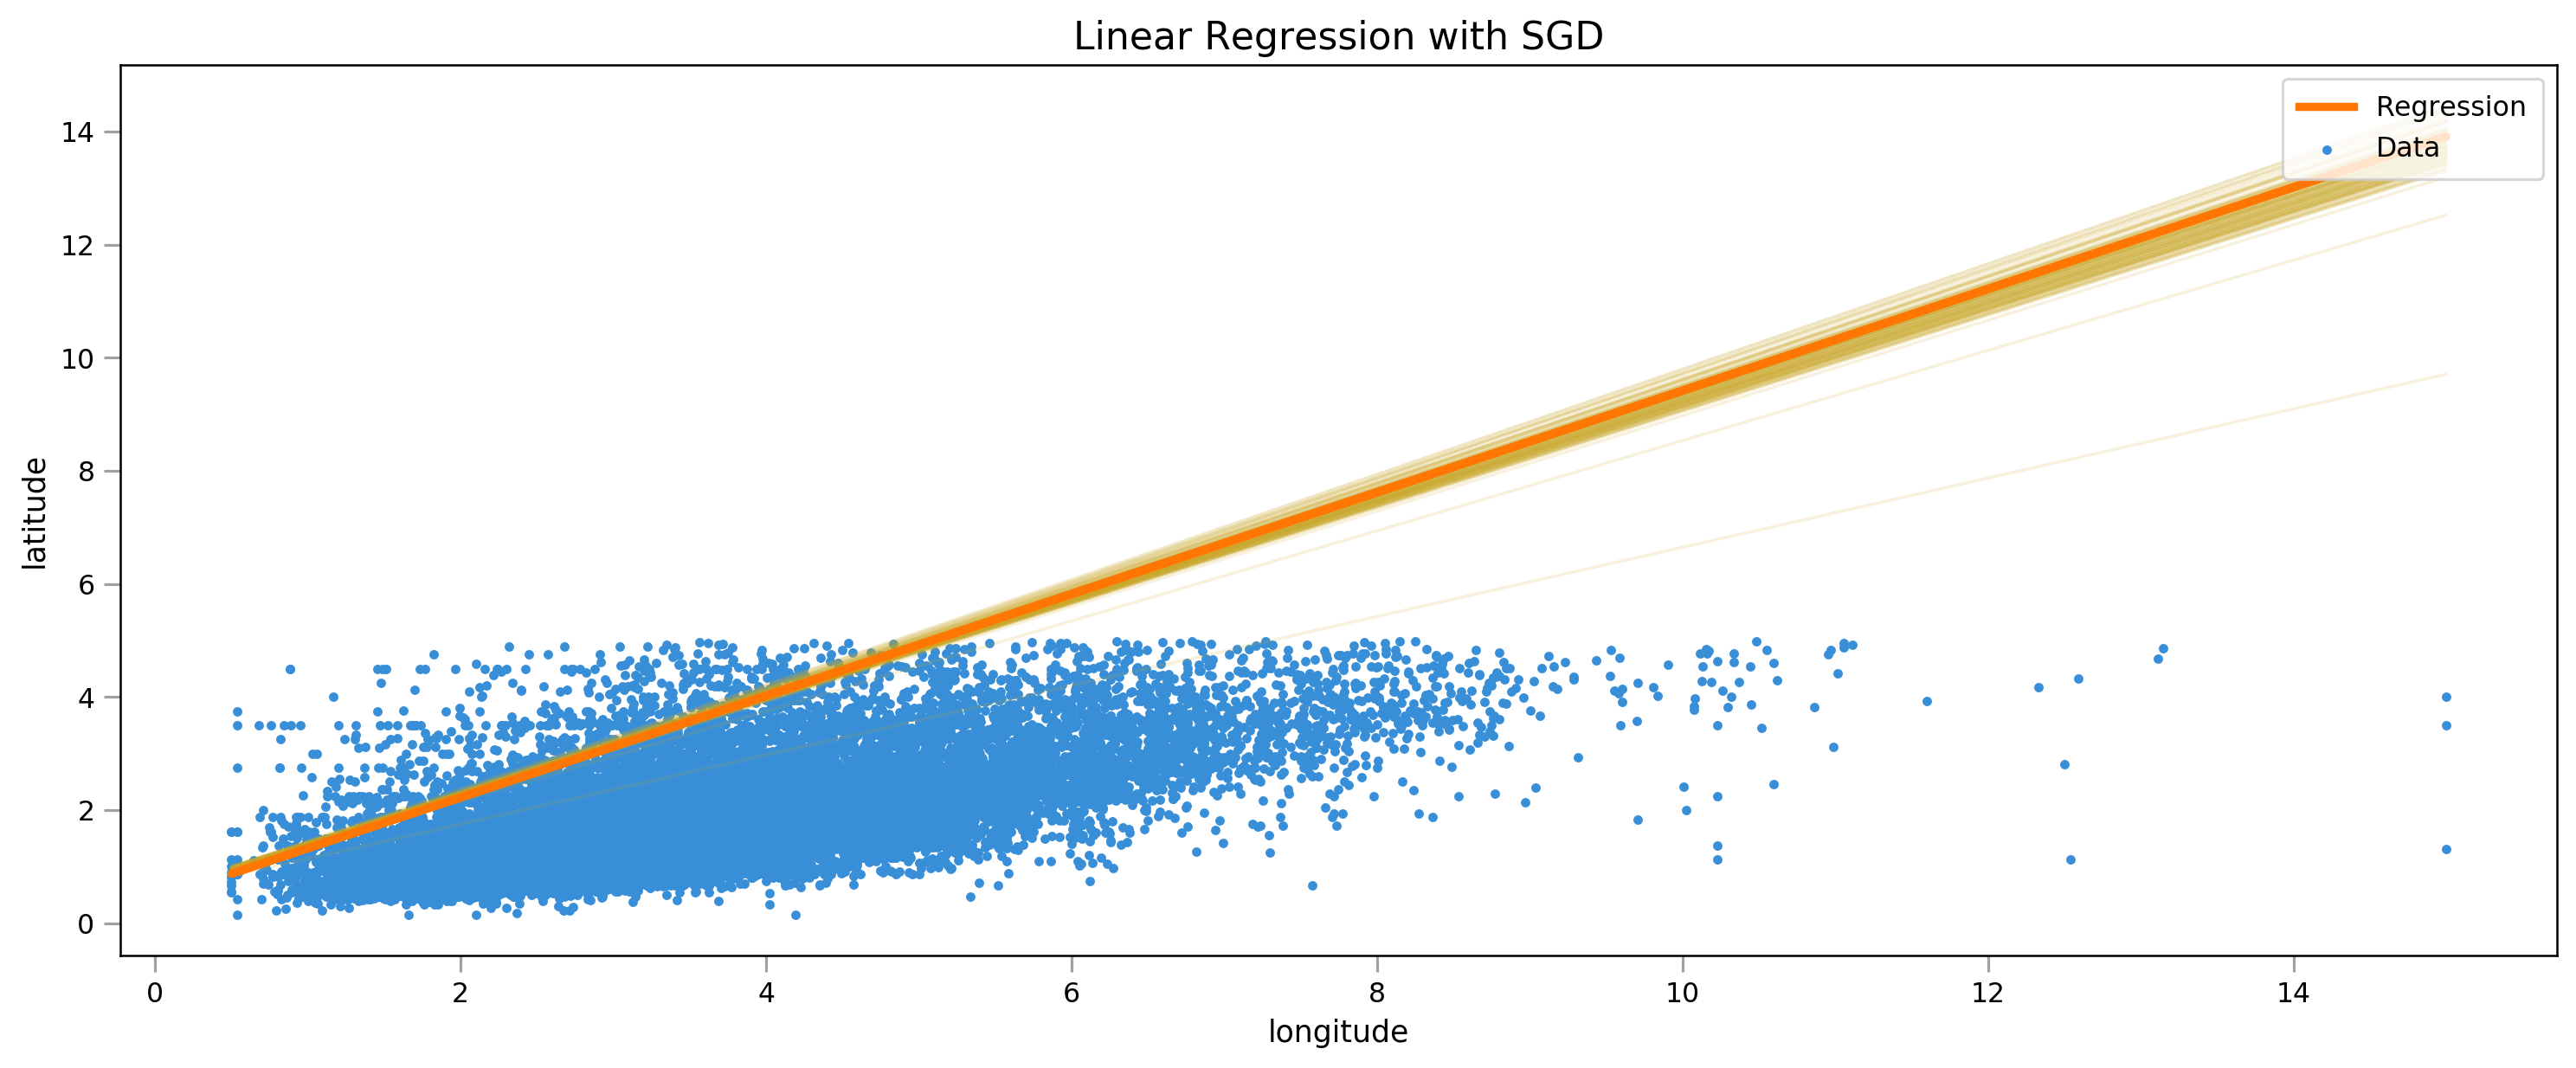

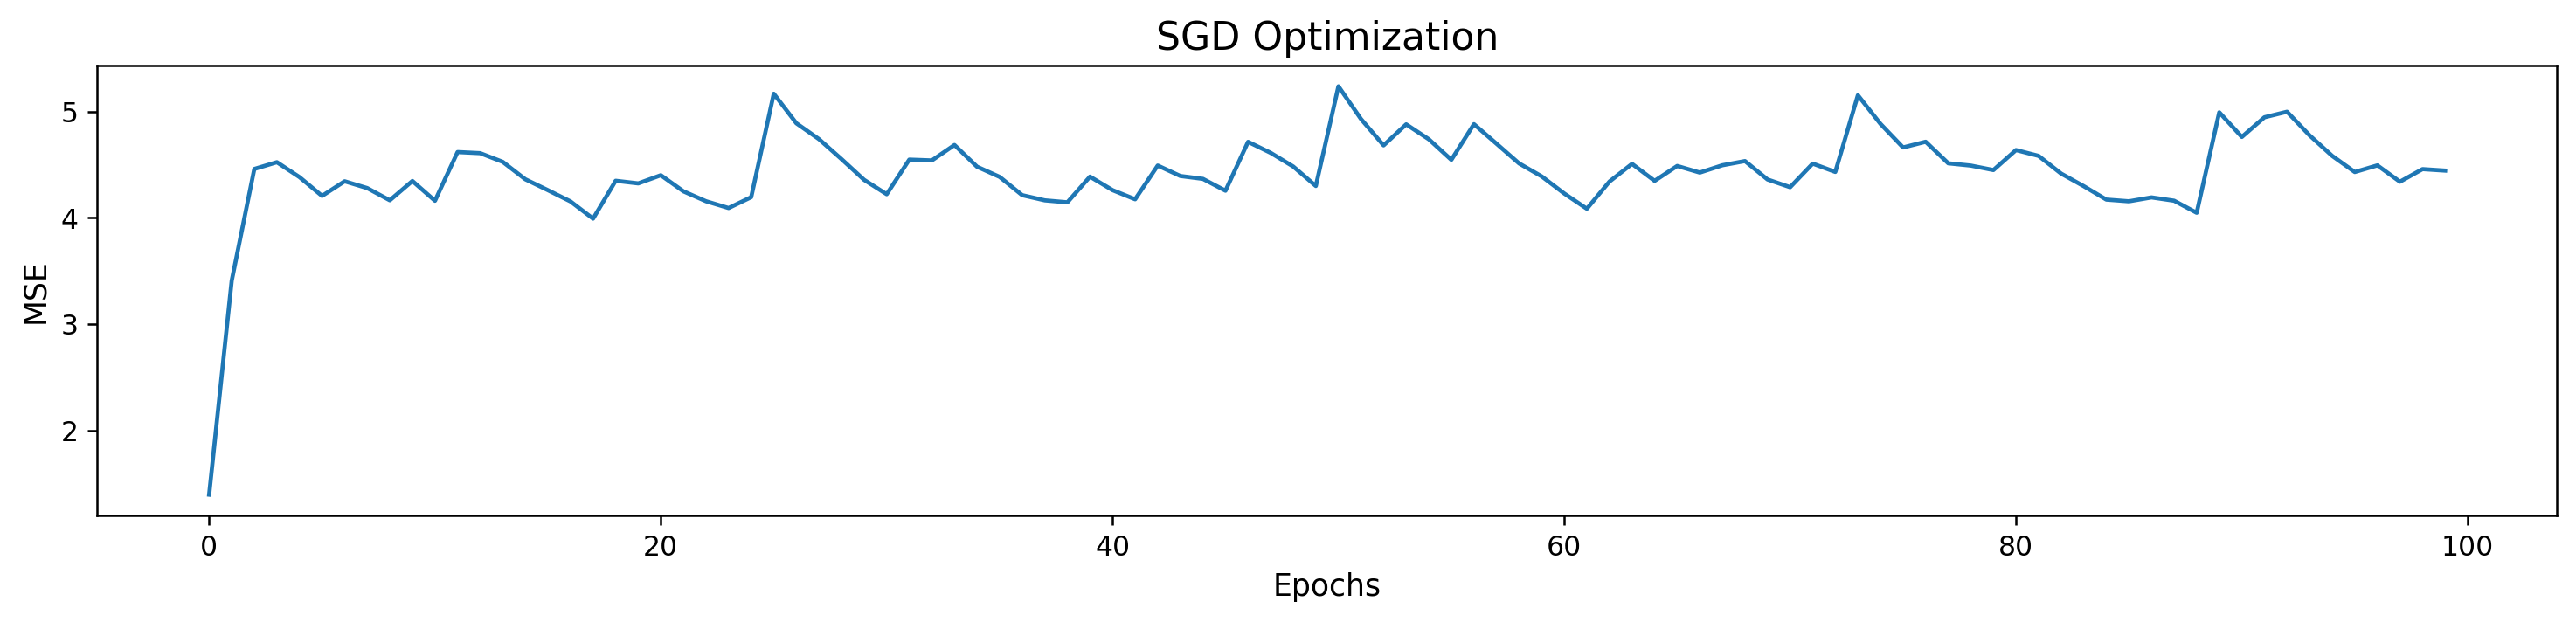

In [130]:
y_pred = m * X + b
print("MSE:",mean_squared_error(y, y_pred))
plot_regression(X, y, y_pred, log=log, title="Linear Regression with SGD")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

###### Speed Test for SGD and Batch Gradient Descent


In [134]:
X = data['MedInc']
y = data['target']

In [135]:
%timeit SGD(X, y, alpha=0.01, epoch=1000, batch_size=1)

4.8 s ± 44.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [136]:
%timeit gradient_descent(X, y, alpha=0.01, epoch=1000)

7.02 s ± 49.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


##### THE END

###### CREDITS: https://github.com/arseniyturin/sgd-from-scratch6